In [1]:
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def bellman_ford(nodes, edges, source):
    """
    nodes: iterable of node ids
    edges: list of tuples (u, v, w)
    Returns: (dist, parent, neg_cycle_nodes)
    """
    INF = float("inf")
    dist = {v: INF for v in nodes}
    parent = {v: None for v in nodes}
    dist[source] = 0
    V = len(nodes)

    for _ in range(V - 1):
        updated = False
        for u, v, w in edges:
            if dist[u] != INF and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                parent[v] = u
                updated = True
        if not updated:
            break

    neg_cycle_nodes = set()
    for u, v, w in edges:
        if dist[u] != INF and dist[u] + w < dist[v]:
            neg_cycle_nodes.add(u)
            neg_cycle_nodes.add(v)

    if neg_cycle_nodes:
        changed = True
        while changed:
            changed = False
            for u, v, w in edges:
                if u in neg_cycle_nodes and v not in neg_cycle_nodes:
                    neg_cycle_nodes.add(v)
                    changed = True

    return dist, parent, list(neg_cycle_nodes)

In [3]:
nodes2 = {"A","B","C","D","E"}
edges2 = [
    ("A","B", 4),
    ("A","C", 5),
    ("B","C", -6),  # negative edge
    ("C","D", 2),
    ("D","E", 1),
    ("B","E", 10)
]

dist2, parent2, negs2 = bellman_ford(nodes2, edges2, "A")
print("Distances from A:", dist2)
print("Negative-cycle-affected nodes (if any):", negs2)

Distances from A: {'C': -2, 'D': 0, 'B': 4, 'E': 1, 'A': 0}
Negative-cycle-affected nodes (if any): []


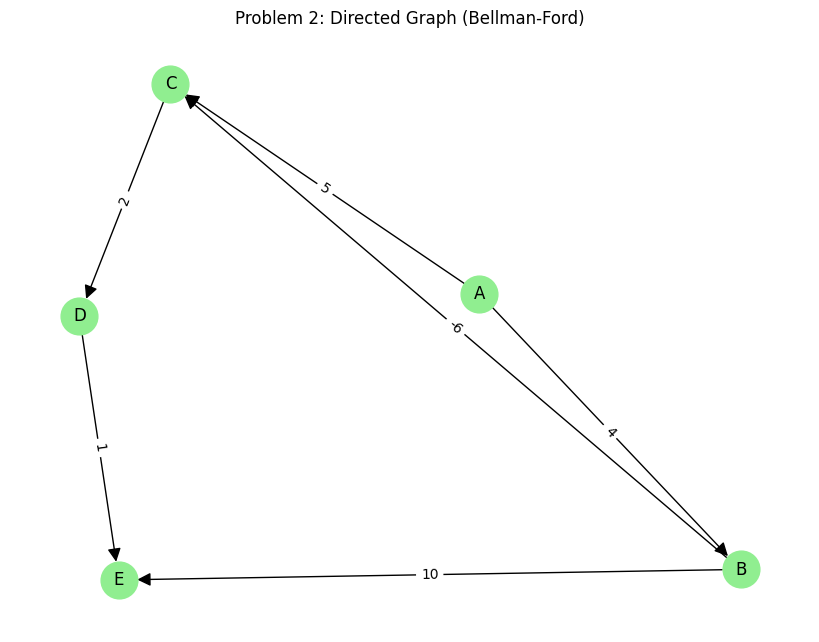

In [4]:
DG = nx.DiGraph()
for u,v,w in edges2:
    DG.add_edge(u, v, weight=w)

pos = nx.spring_layout(DG, seed=2)
plt.figure()
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', node_size=700, arrowsize=20)
edge_labels = {(u,v): d['weight'] for u,v,d in DG.edges(data=True)}
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels)
plt.title("Problem 2: Directed Graph (Bellman-Ford)")
plt.show()

In [5]:
print("\nTime Complexity:")
print("- Bellman-Ford: O(V * E)")
print("- Negative cycle detection: O(E) (included)")
print("- Space: O(V)")


Time Complexity:
- Bellman-Ford: O(V * E)
- Negative cycle detection: O(E) (included)
- Space: O(V)
